<a href="https://colab.research.google.com/github/MariPinas/Proj2AND/blob/main/Proj2AND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho II - Análise de Dados
#### Este trabalho tem como objetivo aplicar os principais algoritmos de classificação e regressão estudados em sala de aula, utilizando bases de dados reais. A proposta visa consolidar o conhecimento técnico e metodológico em Machine Learning, por meio da implementação prática das técnicas, avaliação dos resultados e interpretação crítica das descobertas.

# Base I - Desempenho Estudantil
## Descrição geral:
Contém dados educacionais sobre hábitos, rotinas, apoio familiar e fatores ambientais que ifluenciam o desempenho acadêmico dos estudantes.

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [90]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DataScience-2025/03_desempenho_estudantil.csv", sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Análise Inicial da Base

#### 1.1 Tema e Contexto Empresarial
A base apresenta dados sobre o desempenho dos estudantes em conjunto a dados que podem estar relacionados a ele, dessa forma, é possível analisar e levantar hipóteses sobre estatísticas que podem afetar de forma positiva ou negativa o desempenho de um aluno.

#### 1.2 Dicionário de dados traduzido:
- Hours_Studied: Horas de estudo semanais.
- Attendance: Frequência (%) nas aulas.
- Parental_Involvement: Envolvimento dos pais (Baixo, Médio, Alto).
- Access_to_Resources: Acesso a recursos educacionais (Baixo, Médio, Alto).
- Extracurricular_Activities: Participação em atividades extracurriculares (Sim, Não).
- Sleep_Hours: Horas de sono por noite.
- Previous_Scores: Desempenho anterior.
- Motivation_Level: Motivação do aluno (Baixa, Média, Alta).
- Internet_Access: Acesso à internet (Sim, Não).
- Tutoring_Sessions: Sessões de reforço por mês.
- Family_Income: Renda familiar (Baixa, Média, Alta).
- Teacher_Quality: Qualidade dos professores (Baixa, Média, Alta).
- School_Type: Tipo de escola (Pública, Privada).
- Peer_Influence: Influência dos colegas (Positiva, Neutra, Negativa).
- Physical_Activity: Atividade física semanal (horas).
- Learning_Disabilities: Dificuldades de aprendizagem (Sim, Não).
- Parental_Education_Level: Escolaridade dos pais (Ensino Médio, Superior, Pós).
- Distance_from_Home: Distância de casa para a escola.
- Gender: Gênero.
- Exam_Score: Nota final no exame

#### Número de registros: 6607


## 2 - Limpeza dos dados


In [91]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [92]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [93]:
print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
Parental_Education_Level,1.362192
Teacher_Quality,1.180566
Distance_from_Home,1.014076
Hours_Studied,0.000000
Access_to_Resources,0.000000
Parental_Involvement,0.000000
Attendance,0.000000
Extracurricular_Activities,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000


In [94]:
#Remover dados nulos
df.dropna(inplace=True)

# Remover os dados incorretos (nota maior do que 100)
df.drop(df[df.Exam_Score > 100].index, axis=0, inplace = True)

print(f'As variáveis com mais dados faltantes após alteração, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes após alteração, em porcentagem (%), são:



,0
Hours_Studied,0.0
Attendance,0.0
Parental_Involvement,0.0
Access_to_Resources,0.0
Extracurricular_Activities,0.0
Sleep_Hours,0.0
Previous_Scores,0.0
Motivation_Level,0.0
Internet_Access,0.0
Tutoring_Sessions,0.0


## 3 - Padronizacao dos dados

#### ! Deve ser utilizado One Hot Encoding neste caso deste dataset:
#### Ele possui variaveis categóricas e os modelos LinearRegression, DecisionTreeRegressor, RandomForestRegressor, SVR NAO sabem lidar com esse tipo de variaveis que sao categorias.

In [95]:
# Selecionando as features (X) e o target (y) para regressao e classificacao

Xr = df.drop('Exam_Score', axis=1) # Todas as colunas, exceto 'Exam_Score'
yr = df['Exam_Score'] # A coluna 'Exam_Score' é o target para regressao

#------

Xc = df.drop('Family_Income', axis=1) # Todas as colunas, exceto 'Family_Income'
class_names = {"Low": 1, "Medium": 2, "High": 0} # Ordem alfabetica
yc = df['Family_Income'].map(class_names) # A coluna 'Family_Income' é o target para classificacao.
#.map(class_names), estou fazendo tipo um label encoding so que manual, ele pega o dicionario class_names e vai substituir os valores com as chaves que eu criei

In [96]:
# ONE HOT ENCODING DOS DADOS
# Primeiro separei os dados categoricos para fazer a Regressao (com o Family Income) e Classificacao(Sem o Family Income, pois eh o target)
# Depois defini para cada um os dados numericos, claro que tive que tirar o Exam_score pois ele eh o target da regressao, mas para a classificacao eu deixei ele
dados_Xr = ['Family_Income','Gender', 'Parental_Education_Level', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Teacher_Quality', 'School_Type', 'Peer_Influence','Learning_Disabilities','Distance_from_Home']
dados_Xc = ['Gender', 'Parental_Education_Level', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Teacher_Quality', 'School_Type', 'Peer_Influence','Learning_Disabilities','Distance_from_Home']
dados_num_Xr = ['Hours_Studied','Attendance','Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
dados_num_Xc = ['Hours_Studied','Attendance','Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

encoder = OneHotEncoder(sparse_output=False)
Xc_encoded = encoder.fit_transform(df[dados_Xc])
Xr_encoded = encoder.fit_transform(df[dados_Xr])

# Agora juntei o encoded + colunas numericas para fazer a padronizacao
Xr_final = np.concatenate([Xr_encoded, Xr[dados_num_Xr].values], axis=1)
Xc_final = np.concatenate([Xc_encoded, Xc[dados_num_Xc].values], axis=1)

In [97]:
scaler = StandardScaler()

Xr_scaled = scaler.fit_transform(Xr_final)
Xc_scaled = scaler.fit_transform(Xc_final)

## 4 - Separar treino e teste


In [98]:
# Splitando os dados em conjuntos de treino e teste para cada um
# Primeiro para Regressao
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr_scaled, yr, test_size=0.3, random_state=42
)
#-----
# Depois Classificacao
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc_scaled, yc, test_size=0.3, random_state=42
)

## 5 - Algoritmos de classificação

In [99]:
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=200),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

## 5.1 - Avaliação por modelo (Classificação)


 Regressão Logística
Acurácia : 0.60
Precisão : 0.47
Recall   : 0.50
F1-Score : 0.45


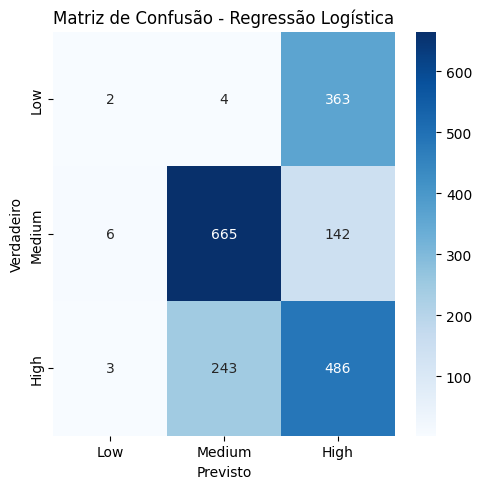


 Árvore de Decisão
Acurácia : 0.34
Precisão : 0.32
Recall   : 0.32
F1-Score : 0.32


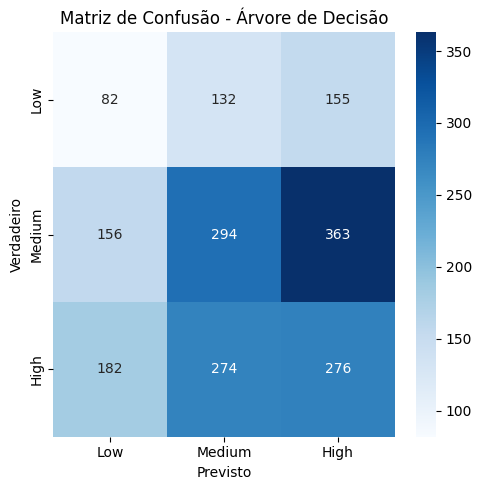


 Random Forest
Acurácia : 0.42
Precisão : 0.33
Recall   : 0.35
F1-Score : 0.32


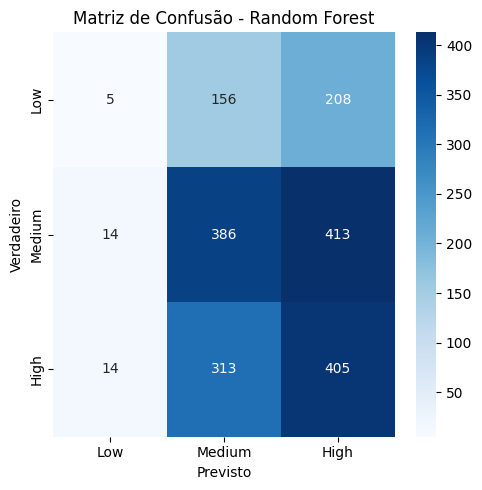


 SVM
Acurácia : 0.42
Precisão : 0.28
Recall   : 0.35
F1-Score : 0.31


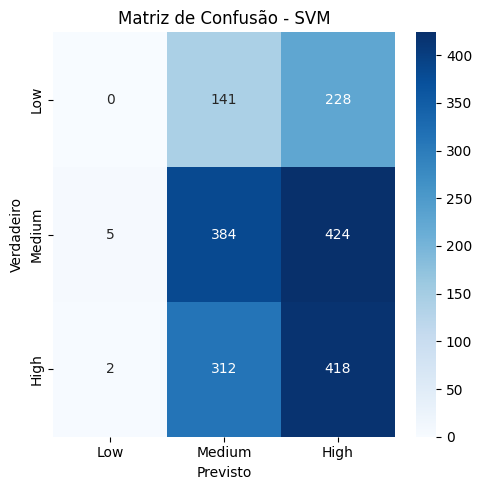


 K-NN
Acurácia : 0.35
Precisão : 0.32
Recall   : 0.32
F1-Score : 0.32


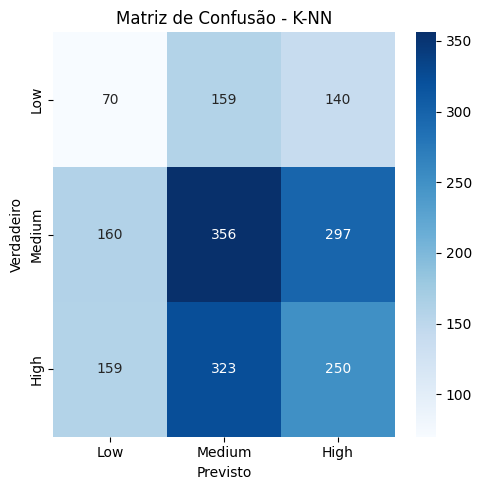

In [100]:
for nome, modelo in modelos.items():
    modelo.fit(Xc_train, yc_train)
    yc_pred = modelo.predict(Xc_test)

    acc = accuracy_score(yc_test, yc_pred)
    prec = precision_score(yc_test, yc_pred, average='macro', zero_division=0)
    rec = recall_score(yc_test, yc_pred, average='macro', zero_division=0)
    f1 = f1_score(yc_test, yc_pred, average='macro', zero_division=0)
    cm = confusion_matrix(yc_test, yc_pred)

    print(f"\n {nome}")
    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")

    # Matriz de confusão
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

## 6 - Analise primaria (Classificação)

Podemos perceber que com esse primeiro treinamento, utilizando somente os hiperparametros que aprendemos, os algoritmos foram no geral bem mal nessa parte de classificacao. Somente na Regressao Logistica atingiu uma acuracia de 60%, o que eh relativamente mediocre, os outros modelos nao conseguiram atingir nem 50% de acuracia. SVM atingiu uma precisao de apenas 28%.

---

## 7 - Algoritmos de Regressão

In [101]:
def avaliar_modelo(y_true, y_pred, nome="Modelo"): # Funcao para avaliar qual o RMSE dos modelos
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome} - RMSE: {rmse:.2f}")

### 7.1 - Regressao Linear

In [102]:
modelo_lr = LinearRegression()
modelo_lr.fit(Xr_train, yr_train)

pred_lr = modelo_lr.predict(Xr_test)
avaliar_modelo(yr_test, pred_lr, "Regressão Linear")

Regressão Linear - RMSE: 1.81


### 7.2 - Árvore de Regressão

In [103]:
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(Xr_train, yr_train)

pred_tree = modelo_tree.predict(Xr_test)
avaliar_modelo(yr_test, pred_tree, "Árvore de Regressão")

Árvore de Regressão - RMSE: 3.74


### 7.3 - Random Forest Regressor

In [104]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(Xr_train, yr_train)

pred_rf = modelo_rf.predict(Xr_test)
avaliar_modelo(yr_test, pred_rf, "Random Forest")

Random Forest - RMSE: 2.19


### 7.4 - Support Vector Regressor (SVR)

In [105]:
modelo_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
modelo_svr.fit(Xr_train, yr_train)

pred_svr = modelo_svr.predict(Xr_test)
avaliar_modelo(yr_test, pred_svr, "SVR")

SVR - RMSE: 2.12


## 7.5 -  Avaliação por modelo (Regressão)...

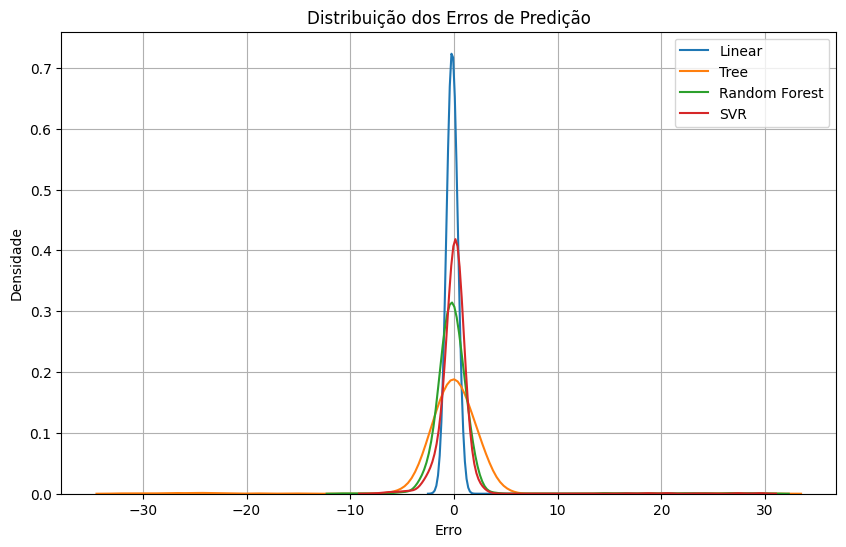

In [106]:
plt.figure(figsize=(10, 6))
sns.kdeplot(yr_test - pred_lr, label="Linear")
sns.kdeplot(yr_test - pred_tree, label="Tree")
sns.kdeplot(yr_test - pred_rf, label="Random Forest")
sns.kdeplot(yr_test - pred_svr, label="SVR")

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()

# FALTA COLOCAR mais ou Explicar HIPERPARAMETROS E DEFENDER O MOTIVO
# FALTA ANALISAR MELHOR
# FALTA FAZER CONCLUSAO
# PRECISA DE BOXPLOT E HISTOGRAMA ?